In [189]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
from turtle import color
from sklearn import datasets
import tensorflow as tf
from tensorflow import Variable
from sklearn.metrics import hinge_loss as sk_hinge_loss

In [27]:
# Example 7.5

X = np.array([[1, 2], 
            [-1, 2],
            [-1, -2]])

y = np.array([-1, -1, 1])

XP = np.zeros(X.shape)


for i in range(X.shape[1]):
    for j in range(X.shape[0]):
        XP[j][i] = X[j][i] * y[j]

X_XT = np.dot(X, np.transpose(X))
print(X_XT)
XP_XPT = np.dot(XP, np.transpose(XP))
print(XP_XPT)

[[ 5  3 -5]
 [ 3  5 -3]
 [-5 -3  5]]
[[5. 3. 5.]
 [3. 5. 3.]
 [5. 3. 5.]]


In [28]:
def dual_optimization(X, y, alpha):
    sum = 0
    n = X.shape[0]
    for i in range(n):
        for j in range(n):
            sum += np.dot(alpha[i] * alpha[j] * y[i] * y[j] * X[i], X[j])
    for i in range(n):
        sum += alpha[i]
    sum *= -0.5
    return sum

(25, 3)
[[6.07223714 8.23355007 1.        ]
 [7.49800981 7.72171354 1.        ]
 [6.65405399 7.79919258 1.        ]
 [5.43078084 8.09886609 1.        ]
 [6.88696748 7.38302917 1.        ]
 [1.80919382 3.83336419 1.        ]
 [1.31385667 3.87578751 1.        ]
 [0.88371902 4.95540885 1.        ]
 [1.25387108 6.41344775 1.        ]
 [5.79541179 9.06573565 1.        ]]
(25,)
[ 1  1  1  1  1 -1 -1 -1 -1  1]


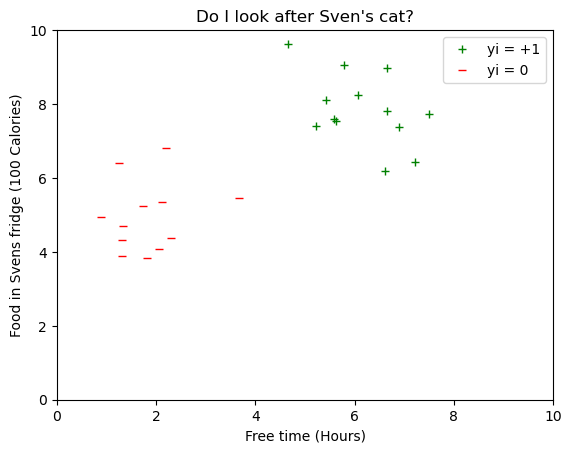

In [62]:
# Generate Dataset
X, y_tmp = datasets.make_blobs(n_samples=25, centers=2, cluster_std=1, n_features=2, center_box=(2, 11), random_state=1)

# Add the 1s to replace the bias term
X = np.hstack((X,np.ones([X.shape[0],1], X.dtype)))

# Swap 0 and 1 values so graph makes sense
y_tmp2 = np.where(y_tmp == 1, -1, y_tmp)
y = np.where(y_tmp2 == 0, 1, y_tmp2)

# Look at data
print(X.shape)
print(X[:10])
print(y.shape)
print(y[:10])

plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], '+', color='green', label='yi = +1')
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], '_', color='red', label='yi = 0')
plt.legend()
plt.xlim(np.array([0,10]))
plt.ylim(np.array([0,10]))
plt.xlabel('Free time (Hours)')
plt.ylabel('Food in Svens fridge (100 Calories)')
plt.title("Do I look after Sven's cat?")
plt.show()

In [219]:
def hinge_loss(yhat, y, w, lam):
    loss = np.mean([max(0, 1-actual*predicted) for actual, predicted in zip(y, yhat)])
    loss += lam * sum(pow(element, 2) for element in w)
    return loss

In [222]:
def get_predictions(w, X):
    yhat = []
    for x in X:
        #yhat.append(np.dot(w, x))
        yhat.append(tf.tensordot(w, x, 1))
    return yhat

In [223]:
w = [32.74655828,   -1.30314603, -113.]
#w = [5,6,7]
lam = 0.00001
epochs = 1000
yhat = get_predictions(w, X)
loss = hinge_loss(yhat, y, w, lam)
print(loss)
loss = sk_hinge_loss(y, yhat)
print(loss)



InvalidArgumentError: cannot compute _MklMatMul as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:MatMul]

In [206]:
def compute_gradient(yhat, y, w, lam):
    with tf.GradientTape() as t:
        loss = tf.Variable(hinge_loss(yhat, y, w, lam))
        d_dw = t.gradient(loss, w)
    return d_dw

In [211]:
def gradient_descent(X, y, w, lam, alpha, epochs):
    for e in range(epochs):
        yhat = get_predictions(w, X)
        d_dw = compute_gradient(yhat, y, w, lam)
        w = w - alpha * d_dw * loss
    return w

In [218]:
alpha = 0.01
epochs = 1000
w = tf.Variable([5.0, 6.0, 7.0])
lam = 0.2

w = gradient_descent(X, y, w, lam, alpha, epochs)
yhat = get_predictions(w, X)
loss = hinge_loss(yhat, y, w, lam)
print('\n\n',loss)
print(w)
print(w[0])

ValueError: The `initial_value` arg to `tf.Variable` must be specified except when you are not providing a `variable_def`. You provided neither.

In [178]:
print(w)
print(w[0])
print(w[1])
print(w[0]/w[1])
float(w[0])

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0.09084658, 0.10901587, 0.12718518], dtype=float32)>
tf.Tensor(0.09084658, shape=(), dtype=float32)
tf.Tensor(0.109015875, shape=(), dtype=float32)
tf.Tensor(0.83333355, shape=(), dtype=float32)


0.09084658324718475

In [180]:


for x, y_i in zip(X, y):
  yhat = np.dot(w, X[i])
  print('Expected: ', y_i, '  Predicted: ', yhat)

Expected:  1   Predicted:  1.6501431075712572
Expected:  1   Predicted:  1.6501431075712572
Expected:  1   Predicted:  1.6501431075712572
Expected:  1   Predicted:  1.6501431075712572
Expected:  1   Predicted:  1.6501431075712572
Expected:  -1   Predicted:  1.6501431075712572
Expected:  -1   Predicted:  1.6501431075712572
Expected:  -1   Predicted:  1.6501431075712572
Expected:  -1   Predicted:  1.6501431075712572
Expected:  1   Predicted:  1.6501431075712572
Expected:  1   Predicted:  1.6501431075712572
Expected:  -1   Predicted:  1.6501431075712572
Expected:  1   Predicted:  1.6501431075712572
Expected:  1   Predicted:  1.6501431075712572
Expected:  -1   Predicted:  1.6501431075712572
Expected:  1   Predicted:  1.6501431075712572
Expected:  -1   Predicted:  1.6501431075712572
Expected:  1   Predicted:  1.6501431075712572
Expected:  -1   Predicted:  1.6501431075712572
Expected:  -1   Predicted:  1.6501431075712572
Expected:  -1   Predicted:  1.6501431075712572
Expected:  -1   Predicte

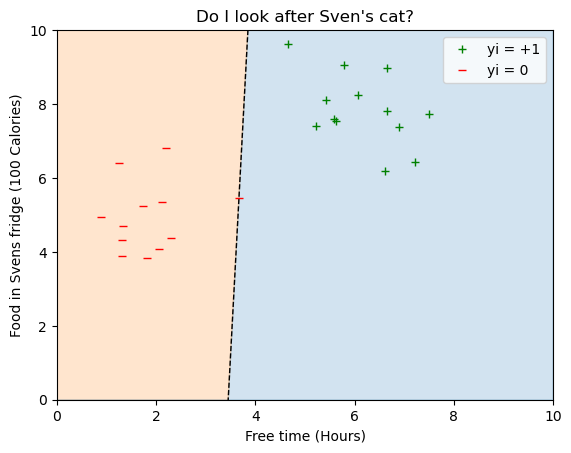

In [185]:
# Plot learned decision boundary
#w = tf.Variable([32.74655828,   -1.30314603, -113])
c = float(-w[2])/float(w[1])
m = float(-w[0]) / float(w[1])


xmin, xmax = 0, 10
ymin, ymax = 0, 10
xd = np.array([xmin, xmax])
yd = m*xd + c

plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)


plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], '+', color='green', label='yi = +1')
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], '_', color='red', label='yi = 0')
plt.legend()
plt.xlim(np.array([0,10]))
plt.ylim(np.array([0,10]))
plt.xlabel('Free time (Hours)')
plt.ylabel('Food in Svens fridge (100 Calories)')
plt.title("Do I look after Sven's cat?")
plt.show()